# 指数平滑化法（Exponential Smoothing model）で予測する方法

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定

In [3]:
# データセットの読み込み
url='https://www.salesanalytics.co.jp/591h' #データセットのあるURL
df=pd.read_csv(url,                      #読み込むデータのURL
               index_col='Month',        #変数「Month」をインデックスに設定
               parse_dates=True)         #インデックスを日付型に設定
df.head() #確認

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


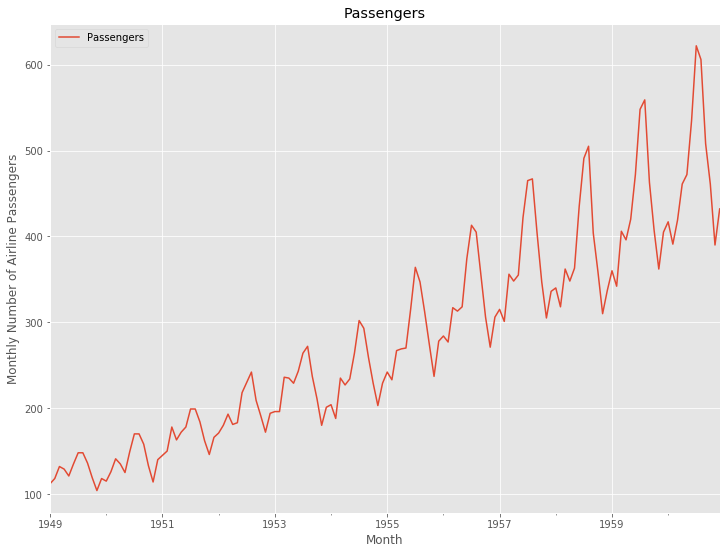

In [4]:
# プロット
df.plot()
plt.title('Passengers')                            #グラフタイトル
plt.ylabel('Monthly Number of Airline Passengers') #タテ軸のラベル
plt.xlabel('Month')                                #ヨコ軸のラベル
plt.show()


In [5]:
# 学習データとテストデータ（直近12ヶ月間）に分割
train = df.iloc[:-12, :] #学習データ
test = df.iloc[-12:, :]  #テストデータ

In [6]:
train.head

<bound method NDFrame.head of             Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1959-08-01         559
1959-09-01         463
1959-10-01         407
1959-11-01         362
1959-12-01         405

[132 rows x 1 columns]>

In [7]:
test.head

<bound method NDFrame.head of             Passengers
Month                 
1960-01-01         417
1960-02-01         391
1960-03-01         419
1960-04-01         461
1960-05-01         472
1960-06-01         535
1960-07-01         622
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432>

## 予測精度の評価指標

- RMSE（二乗平均平方根誤差）
- MAE（平均絶対誤差）
- MAPE（平均絶対パーセント誤差）

## 今回検討するモデル

- Simple Exponential Smoothing model（単純指数平滑化法モデル）
- Holt's Linear Smoothing model（Holtの線形指数平滑法モデル）
- Holt-Winter's Seasonal Smoothing model（ホルト-ウィンターズ法モデル）

### Simple Exponential Smoothing model（単純指数平滑化法モデル）

特徴
- トレンド成分：なし
- 季節成分：なし

トレンド成分も季節成分もなさそうな、時系列データをモデル化する手法

In [9]:
# モデルの学習
SES_model = SimpleExpSmoothing(train)
SES_model_fit = SES_model.fit(smoothing_level=0.5)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [13]:
# テストデータで精度検証
SES_pred = SES_model_fit.forecast(12) # 予測

print('RMSE:')
print(np.sqrt(mean_squared_error(test, SES_pred)))
print('MAE:')
print(mean_absolute_error(test, SES_pred))
# print('MAPE:')
# print(mean_absolute_percentage_error(test, SES_pred))

RMSE:
102.50701723853366
MAE:
75.54593925699346


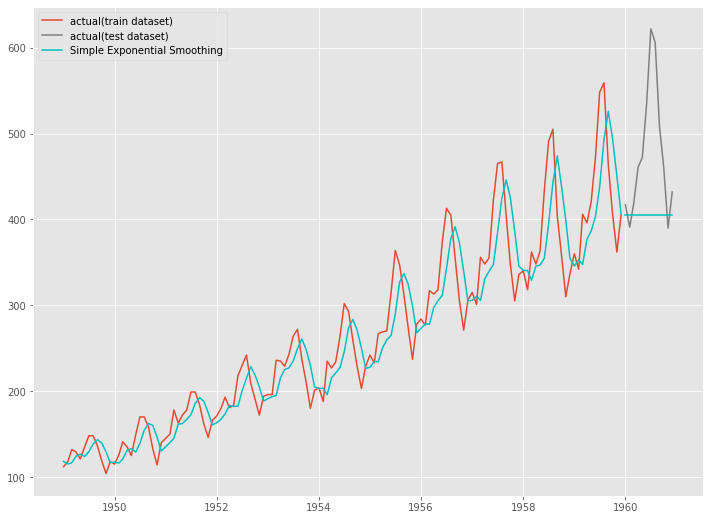

In [15]:
# グラフ化
fig, ax = plt.subplots()
ax.plot(train.index, train.values, label="actual(train dataset)")
ax.plot(test.index, test.values, label="actual(test dataset)", color="gray")
ax.plot(train.index, SES_model_fit.fittedvalues, color="c")
ax.plot(test.index, SES_pred, label="Simple Exponential Smoothing", color="c") 
plt.legend()

### Holt's Linear Smoothing model（Holtの線形指数平滑法モデル）

特徴
- トレンド成分：あり
- 季節成分：なし

トレンド成分はありそうだが、季節成分がなさそうな時系列データをモデル化する手法

In [31]:
# モデルの学習
Holt_model = Holt(train)
Holt_model_fit = Holt_model.fit(smoothing_level=.3)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [32]:
# テストデータで精度検証
Holt_pred = Holt_model_fit.forecast(12) #予測
print('RMSE:')
print(np.sqrt(mean_squared_error(test, Holt_pred)))
print('MAE:')
print(mean_absolute_error(test, Holt_pred)) 
# print('MAPE:')
# print(mean_absolute_percentage_error(test, Holt_pred))

RMSE:
80.58795298704041
MAE:
59.501490021468896


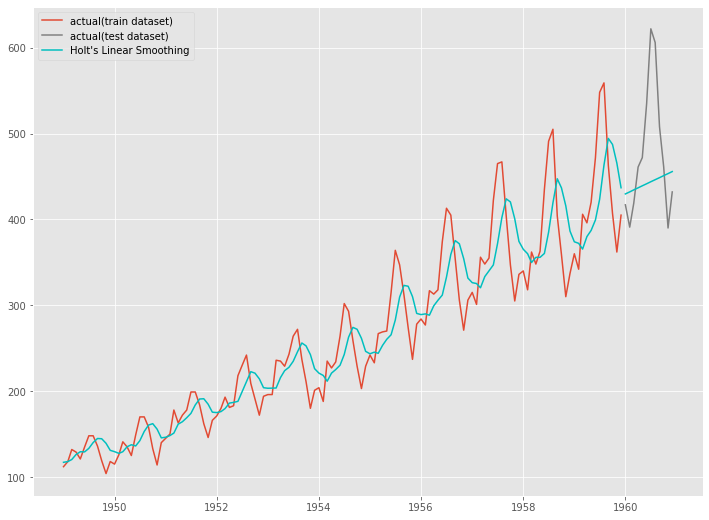

In [34]:
fig, ax = plt.subplots()
ax.plot(train.index, train.values, label='actual(train dataset)')
ax.plot(test.index, test.values, label='actual(test dataset)', color='gray')
ax.plot(train.index, Holt_model_fit.fittedvalues, color='c')
ax.plot(test.index, Holt_pred, label="Holt's Linear Smoothing", color='c')
plt.legend()

### Holt-Winter’s Seasonal Smoothing model（ホルト-ウィンターズ法モデル）

特徴
- トレンド成分：あり（なしにもできる）
- 季節成分：あり（なしにもできる）

Holt-Winter’s Seasonal Smoothing model（ホルト-ウィンターズ法モデル）は、トレンド成分を考慮したりしなかったり、季節成分を考慮したりしなかったりと、非常に使い勝手が良い。

In [35]:
# モデルの学習
HW_model = ExponentialSmoothing(train,
                                trend = 'additive',
                                seasonal = 'additive',
                                seasonal_periods = 12)
HW_model_fit = HW_model.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [36]:
# テストデータで精度検証
HW_pred = HW_model_fit.forecast(12)

print('RMSE:')
print(np.sqrt(mean_squared_error(test, HW_pred)))
print('MAE:')
print(mean_absolute_error(test, HW_pred)) 

RMSE:
15.570830855326424
MAE:
10.455564897828168


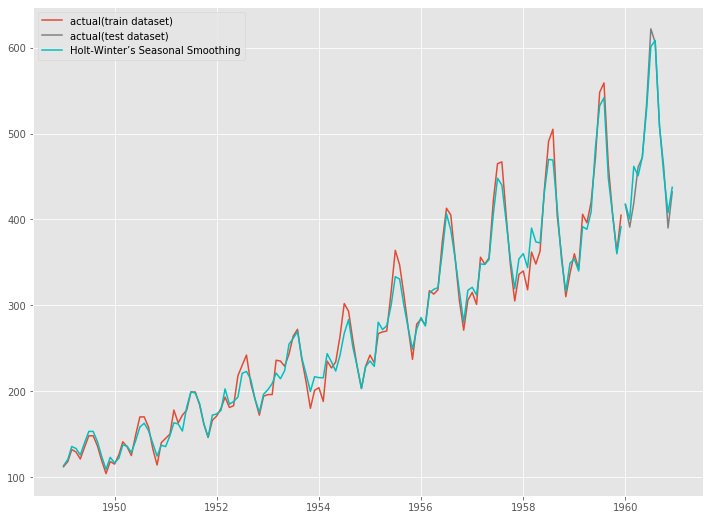

In [37]:
# グラフ化
fig, ax = plt.subplots()
ax.plot(train.index, train.values, label="actual(train dataset)")
ax.plot(test.index, test.values, label="actual(test dataset)", color="gray")
ax.plot(train.index, HW_model_fit.fittedvalues, color="c")
ax.plot(test.index, HW_pred, label="Holt-Winter’s Seasonal Smoothing", color="c") 
plt.legend()